# Customer Data

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('customer_shopping_data.csv')

In [72]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


*Customer data has customer id's along with the shopping items. Personal data has age and payment method. Etc....*

In [73]:
# understandin datatypes
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [74]:
# finding any nulls or missing values
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

*no missing values, which is a good sign*

**Pro-tip**

*alternative way for finding missing values*

isna() and isnull() are functionally identical — you can use either.

So:

Use .sum() when you want to know how many are missing.

Use .any() when you just want to know if any are missing.

In [75]:
df.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


df.info() gives a quick overview — useful for spotting missing values at a glance.

df.isna().sum() is better if you want exact missing counts.

df.isnull().any() is better for yes/no checks.

# Univariate Analysis

*gender*

gender
Female    59482
Male      39975
Name: count, dtype: int64


Text(0.5, 1.0, 'Count based on customer gender')

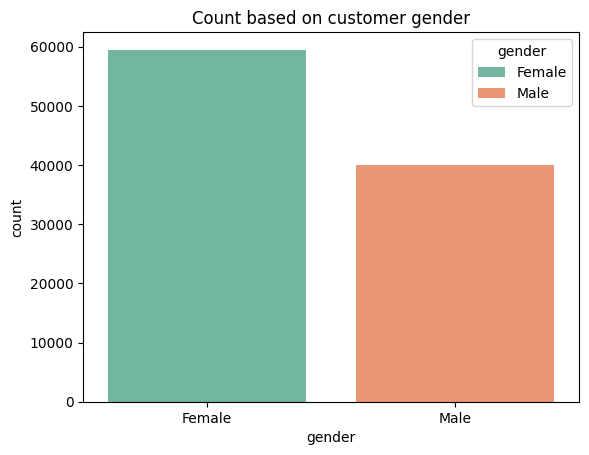

In [77]:
# understandin count in pandas
print(df.gender.value_counts())
# visualize population using seaborn python library
sns.countplot(data=df,x= 'gender', hue='gender',palette='Set2',legend=True)
plt.title('Count based on customer gender')

*As-expected, more female customer than male. There is high chance that more number of female brands present or beauty options, etc...*

In [78]:
# Checking unique values in invoice
df.customer_id.nunique()

99457

In [79]:
df.invoice_no.nunique()

99457

*age*

C:\Users\sunta\AppData\Local\Temp\ipykernel_34020\612874098.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x='age', palette='Set2',legend=True)


Text(0.5, 1.0, 'Age histogram')

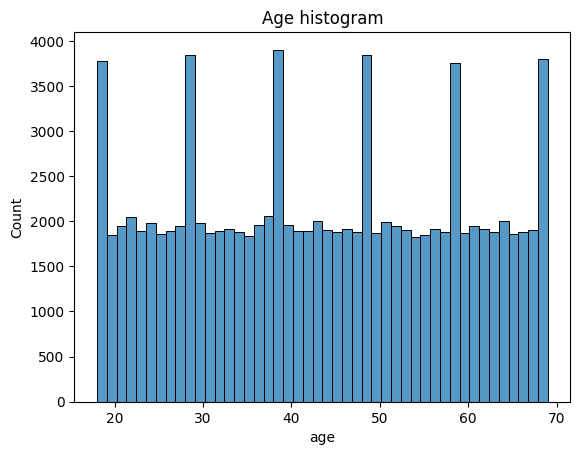

In [80]:
# best plot to use is histogram
sns.histplot(data=df,x='age', palette='Set2',legend=True)
plt.title('Age histogram')

*You can all add binwidths,binrange and create a custom histogram.
As a Data Analyst, most used histogram visualization is taken from excel, as it is very easy to update and done in few clicks.*

*Density plots or probability plots can be explored in histogram*

*category*

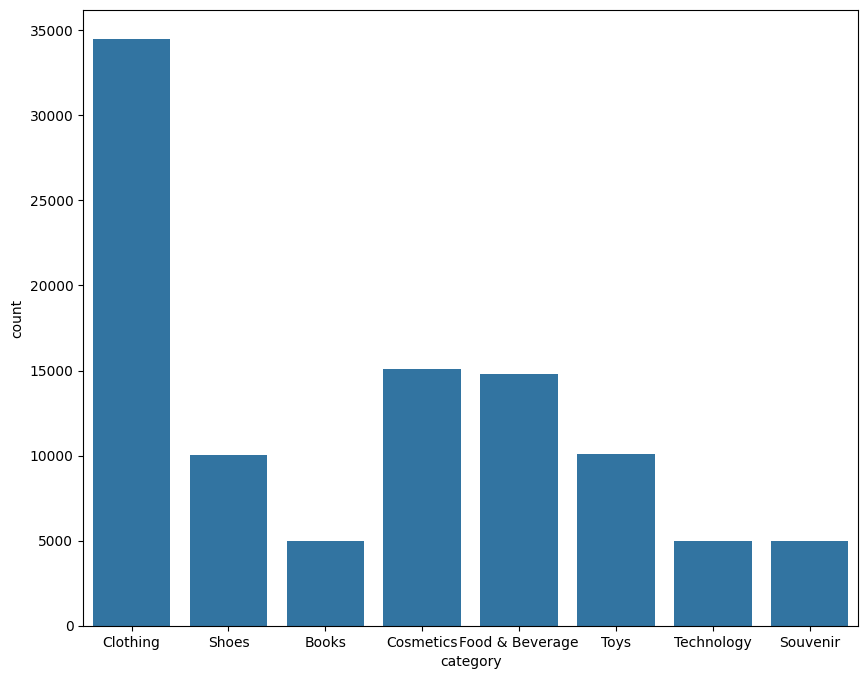

In [81]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='category')
plt.show()

*As expected more Female shoppers, so clothing, cosmetics & Food & Beverages.
As a business pov.........*

*payment method used*

<Axes: xlabel='payment_method', ylabel='count'>

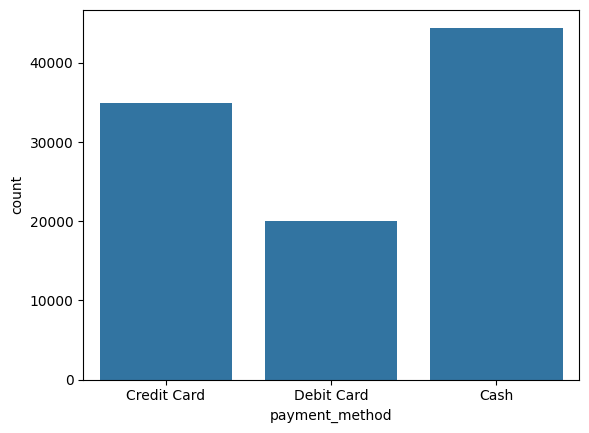

In [82]:
sns.countplot(data=df,x='payment_method')

*Most of the customers are still using traditional ways of payment. There is an opportunity to digitalize payments by introducing rewards/schemes on card payment methods*

*shopping mall*

<Axes: xlabel='shopping_mall', ylabel='count'>

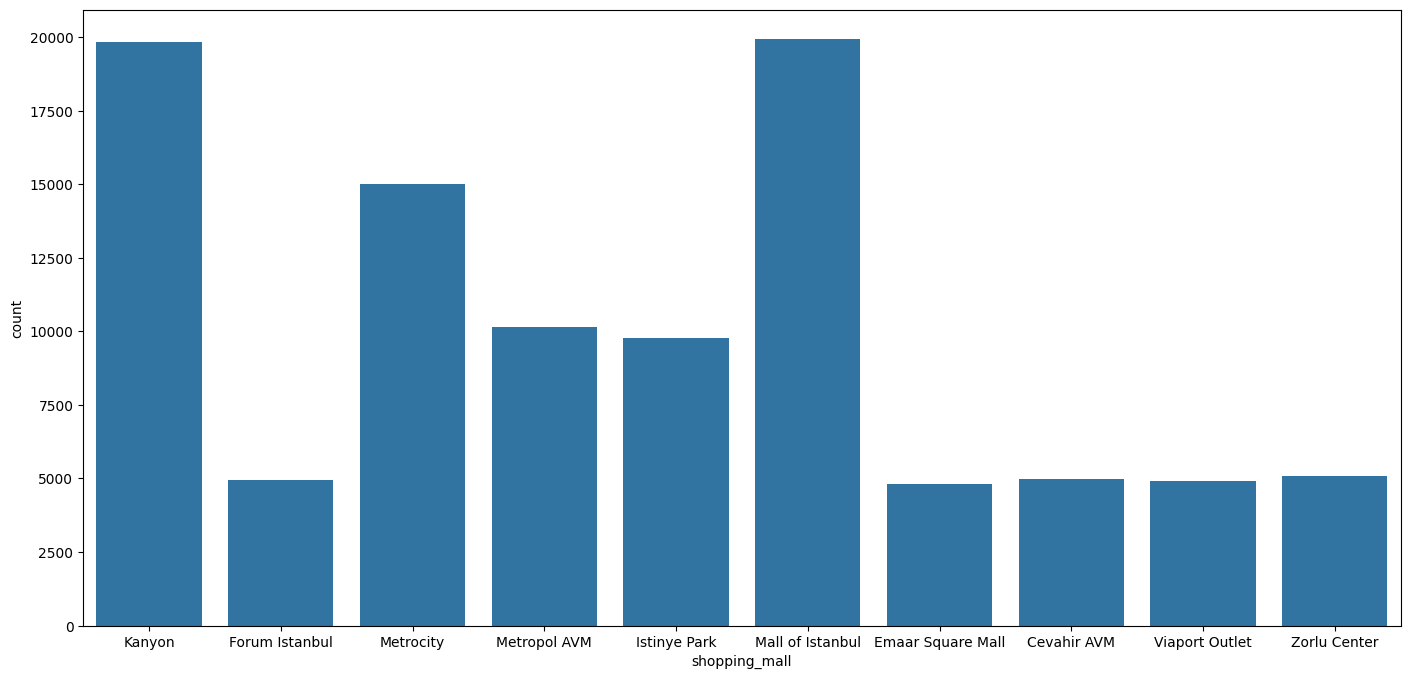

In [83]:
plt.figure(figsize=(17,8))
sns.countplot(data=df,x='shopping_mall')

*There is a very high chance Mall of istanblu is at a tourist place in the city center. Easily accessible with trains, buses & cabs. Might have free parking for the fisrt hours, etc...*

*age*

<Axes: ylabel='age'>

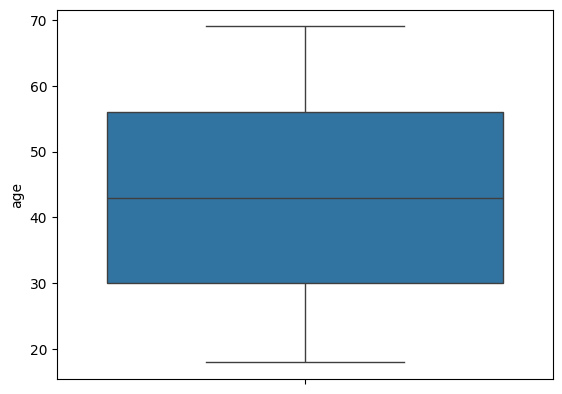

In [84]:
sns.boxplot(data=df,y='age')

*no outliers. All age people visits malls overall.*

*price*

<Axes: ylabel='price'>

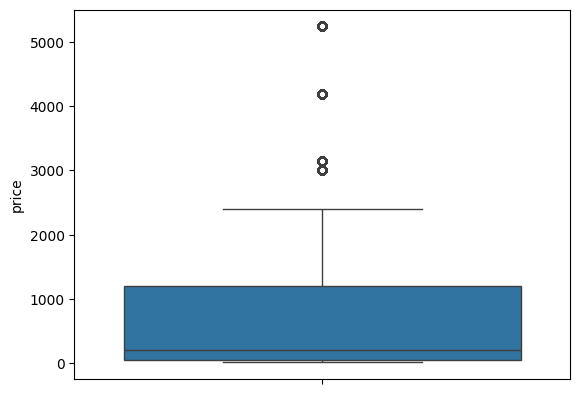

In [85]:
sns.boxplot(data=df, y='price')

*Descriptive statistics is also a good approach*

In [86]:
df['price'].describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64

*Average spending is approx 700 turkish lira*

**Now we have a basic view of how the data looks. We can start doing bivariate analysis to find relations between two different variables**

# Bivariate Analysis

*Relation between Gender & Category*

In [87]:
pd.crosstab(df.gender, df.category, values=df.age, aggfunc='count')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,2906,20652,9070,8804,5967,3017,2981,6085
Male,2075,13835,6027,5972,4067,1982,2015,4002


<Axes: xlabel='category', ylabel='count'>

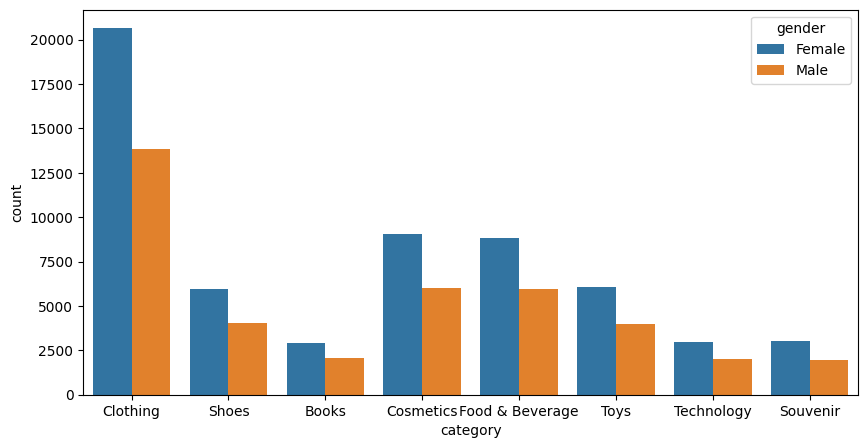

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='category',hue='gender')

*Females invest most time in buying clothing, followed by cosmetics, food..etc.. No surprise here!*


In [88]:
# creating age custom bins
# using pandas cut function
cut_off_age = [0,20,30,40,50,60,70]
labels =  ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age']=pd.cut(df.age,bins=cut_off_age,labels=labels)

*Relation between gender & age*

In [93]:
pd.crosstab(df.gender,df.age,values=df.age,aggfunc='count')

age,0-20,21-30,31-40,41-50,51-60,61+
gender,,,,,,
Female,3314,11597,11562,11398,11357,10254
Male,2310,7803,7704,7668,7575,6915


*More young people in the mall*